In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

### Найдем константу в номере 1с восьмого теоретического задания
Cгенерируем шум случайный

In [2]:
xi = sps.norm.rvs(size= (int(1e7)))

In [3]:
xi

array([-1.29654271, -0.89950647, -0.07559465, ..., -1.75721483,
        0.88281918, -1.14197222])

Подсчитаем ряд как он записан в условии, считая, что некоторые начальные элементы ни на что не влияют (если изменить некоторые $y_0, y_1.. y_3$ на произвольные числа, то их вклад в $y_t$ при большом t будет минимален, т.к. перед ними будет коэффициент вида $(1/2)^{(O(t))}$)

$y_t = -1 - y_{t-2} - 0.25 y_{t-4} + \xi_t - \xi_{t-3}$

In [4]:
y = np.zeros(int(1e7))

In [5]:
for t in range(4, len(y)):
    y[t] = -1 - y[t-2] - 0.25*y[t-4] + xi[t] - xi[t-3]

Посмотрим его среднее

In [6]:
y.mean()

-0.4444443229445359

В теории оно было:

In [7]:
-4/9

-0.4444444444444444

Теперь вычислим ряд в модели $MA(\infty)$
Формулы, описанные ниже и их доказательство можно найти в моём письменном ДЗ

In [8]:
n = np.arange(int(1e7))

In [9]:
xn = (-0.5) ** n * (n + 1)

In [10]:
a = np.zeros(int(1e7))

In [14]:
a[0] = 1
a[1] = 0
for i in range(2, len(a)):
    if i % 2 == 0:
        a[i] = xn[i // 2]
    else:
        a[i] = -xn[(i - 3) // 2]

In [15]:
a[:10]

array([ 1.    ,  0.    , -1.    , -1.    ,  0.75  ,  1.    , -0.5   ,
       -0.75  ,  0.3125,  0.5   ])

In [32]:
l = len(a)
y_2 = [a[:(l - last)] @ ((xi[:(l - last)])[::-1]) for last in range(100)]
y_2 = np.array(y_2)[::-1]

Ряды составлены из одних и тех же $\xi$, поэтому не должны отличаться. Занулим константу в $MA(\infty)$ и построим ряды.

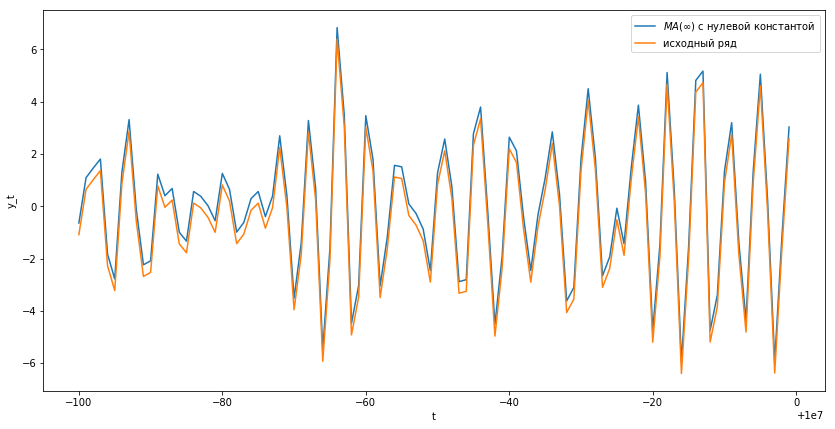

In [41]:
plt.figure(figsize=(14,7))
grid = np.arange(l - 100, l)
plt.plot(grid, y_2, label="$MA(\infty)$ с нулевой константой")
plt.plot(grid, y[-100:], label="исходный ряд")
plt.xlabel("t")
plt.ylabel("y_t")
plt.legend()
plt.show()

Всё верно. Найдём константу, вычев разницу между рядами.

In [39]:
cnst = y[-100:] - y_2

In [40]:
cnst

array([-0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44444444,
       -0.44444444, -0.44444444, -0.44444444, -0.44444444, -0.44

**Вывод:** Константа в $MA(\infty)$ равна -4/9